In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# usual imports
import numpy as np
import pandas as pd
import visualization as vis

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
pipe = pd.read_csv('~/projects/capstone/pipeline_data.csv')
pipe.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [3]:
pipe.shape

(2795, 48)

In [4]:
#Identify numeric vs. Categorical data
pipe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

## Visualization & understanding

What are the intuitve factors that will affect 'ALL COSTS': To begin the analysis:
1.) Accident date/time - Are there more frequent accidents based on extreme temperatures/ or late at night?
2.)Location- What areas experience the most accidents 
3.) Operator name. Is one company more prone to accidents than others? If so, why?
4.) Liquid type- Is there a certain liquid type that causes more accidents?
5.) Cause Category - What is the main cited reason for accidents?

In [5]:
# A closer look into the numerical features:
pipe.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


In [8]:
pipe['Cause Category'].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
ALL OTHER CAUSES                118
NATURAL FORCE DAMAGE            118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1141690d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1176d3ad0>]], dtype=object)

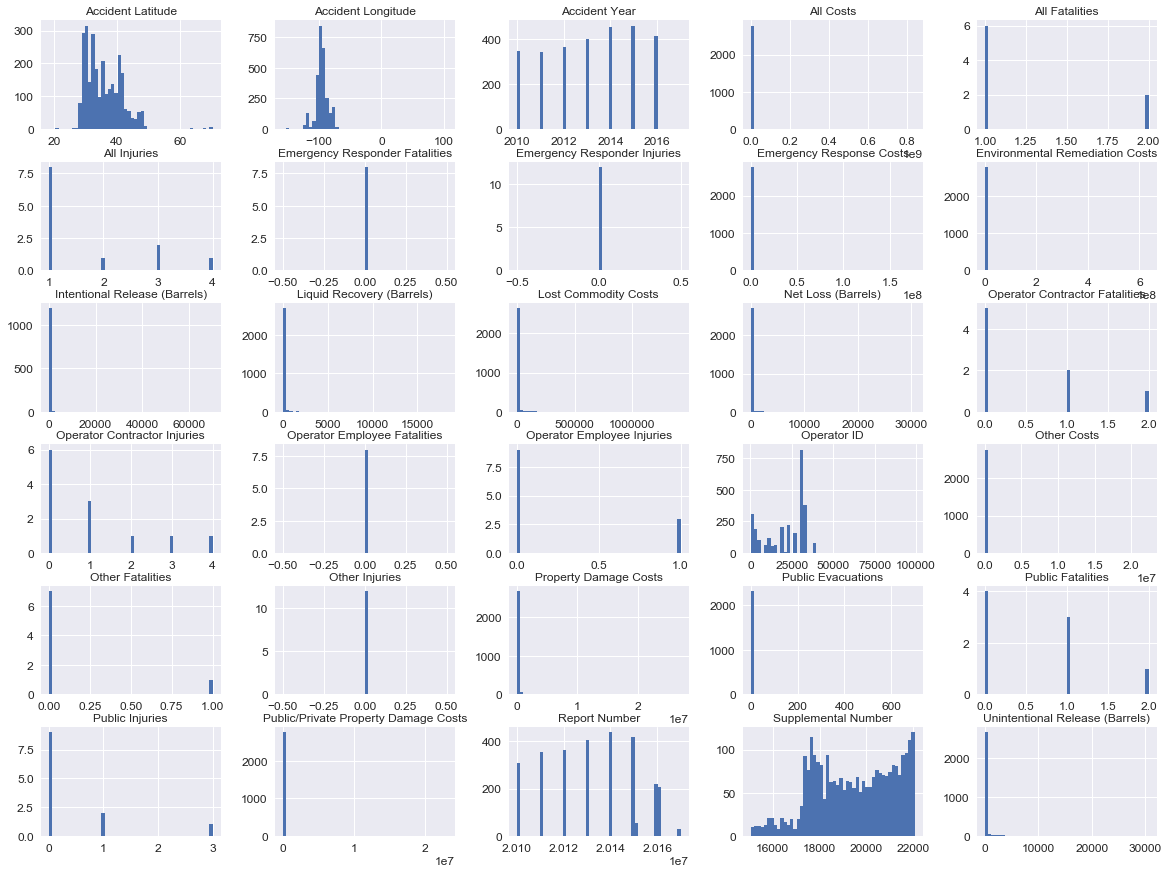

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
pipe.hist(bins=50, figsize=(20, 15))

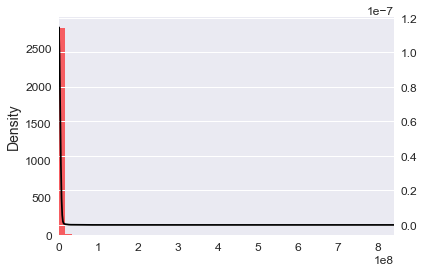

In [11]:
#lets take a closer look at the target variable:
import visualization as vis
vis.hist_density_plot(pipe, x='All Costs')

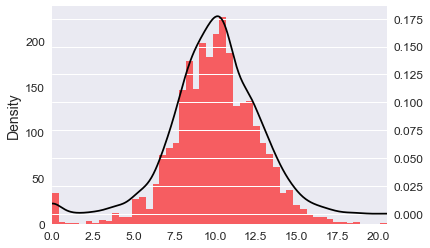

In [12]:
#Gives us very little information, lets apply a log transformation to get a better idea:
vis.hist_density_plot(pipe, x='All Costs', logx='True')

In [13]:
sum(pipe['All Costs']) # 2.3 Billion in total costs

2331122923

In [15]:
max(pipe['All Costs'])

840526118

In [18]:
#Log tranformation for 'All Costs':

pipe['Log_All'] = np.log1p(pipe['All Costs'])
pipe.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Log_All
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,7.395108
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,8.296297
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,5.303305
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,9.353661
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,10.297251


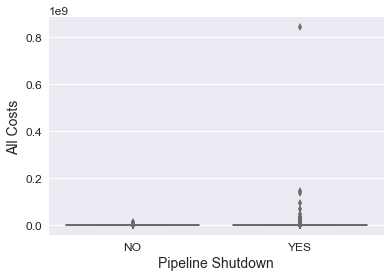

In [14]:
import seaborn as sns
sns.boxplot(x= 'Pipeline Shutdown',
           y= 'All Costs',
           data= pipe,
           palette='Set3')


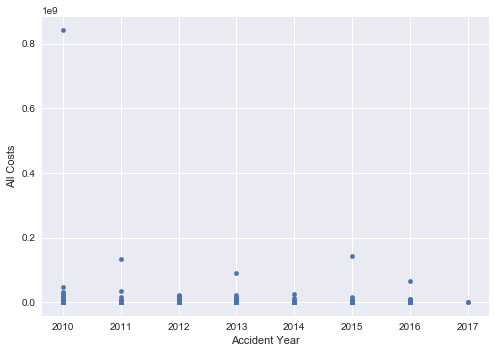

In [44]:
pipe.plot.scatter( x='Accident Year', y='All Costs')

In [50]:
pipe['Operator Name'].value_counts()

ENTERPRISE CRUDE PIPELINE LLC                        195
SUNOCO PIPELINE L.P.                                 180
PLAINS PIPELINE, L.P.                                156
ENTERPRISE PRODUCTS OPERATING LLC                    155
MAGELLAN PIPELINE COMPANY, LP                        140
COLONIAL PIPELINE CO                                 136
BUCKEYE PARTNERS, LP                                 115
MARATHON PIPE LINE LLC                                87
KINDER MORGAN LIQUID TERMINALS, LLC                   87
PHILLIPS 66 PIPELINE LLC                              80
ENBRIDGE ENERGY, LIMITED PARTNERSHIP                  71
SHELL PIPELINE CO., L.P.                              60
EXXONMOBIL PIPELINE CO                                49
EXPLORER PIPELINE CO                                  42
ONEOK NGL PIPELINE LP                                 39
MAGELLAN AMMONIA PIPELINE, L.P.                       37
ONEOK NGL PIPELINE, LLC                               36
KOCH PIPELINE COMPANY, L.P.    

In [51]:
sum(pipe['All Costs']) # 2.3 Billion in total costs

2331122923

### Missing Data

In [19]:
pipe_na = (pipe.isnull().sum() / len(pipe)) * 100
pipe_na = pipe_na.drop(pipe_na[pipe_na == 0].index).sort_values(ascending=False)

[<matplotlib.text.Text at 0x11ab7e750>, <matplotlib.text.Text at 0x11ab5b810>]

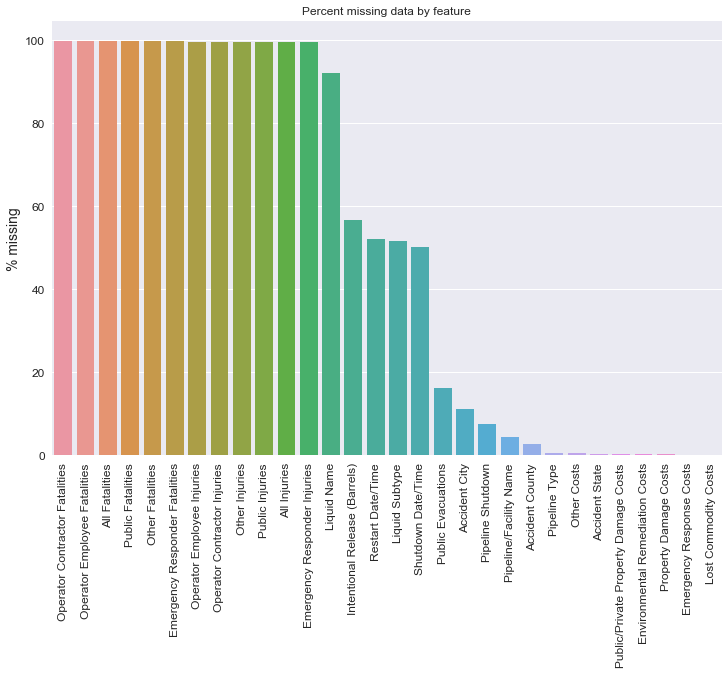

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=pipe_na.index, y=pipe_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')